In [1]:
import sys
sys.path.append('../')

In [2]:
from win10toast import ToastNotifier
toast = ToastNotifier()

In [3]:
import torch
import itertools
import pandas as pd
import numpy as np
from tqdm.auto import tqdm, trange

from models.train import train, test
from models.models import StateActionModel
from models.utils import set_seed

from game.simulator import load_simulator_yarn

In [4]:
def pretty(ld, indent=0):
    with open('result.txt', 'w', encoding='utf-8') as file:
        for d in tqdm(ld):
            file.write('{' + '\n')
            for key, value in d.items():
                file.write('\t' * (indent+1) + str(key) + ':' + str(value) + '\n')
                # file.write('\t' * (indent+1) + str(key) + '\n')
                # file.write('\t' * (indent+2) + str(value) + '\n')
            file.write('},\n')

In [5]:
do_train = True

seed = 4444

metric_filter_1 = 'test_mcc'
metric_filter_2 = 'val_mcc'

data_dir = '../yarnScripts'
log_path = './logs'
save_path = './saved'

graph = load_simulator_yarn('../yarnScripts').graph

## BERT Fine-tuned

In [6]:
save_model = f'{save_path}_bert'
log_dir = f'{log_path}_bert'

dict_model = dict(
    shared_out_dim=[125,75,200],
    state_layers=[[20], [30]],
    action_layers=[[20], [30]],
    out_features=[1],
    lstm_model=[False],
    bert_name=["bert-base-multilingual-cased"],
    # training parameters
)

list_model = [dict(zip(dict_model.keys(), k)) for k in itertools.product(*dict_model.values())]

In [ ]:
if do_train:
    for d in tqdm(list_model):
        set_seed(seed)
        d = d.copy()

        train(
            model=StateActionModel(**d),
            dict_model=d,
            log_dir=log_dir,
            graph=graph,
            save_path=save_model,
            lr=1e-3,
            optimizer_name="adamw",
            n_epochs=80,
            batch_size=8,
            num_workers=0,
            scheduler_mode='max_val_acc',
            debug_mode=False,
            steps_save=20,
            use_cpu=False,
            freeze_bert=True,
            balanced_actions=False,
            scheduler_patience=20,
        )

#### Results

In [7]:
res_test = test(
    graph=graph,
    save_path=save_model,
    n_runs=1,
    batch_size=32,
    num_workers=0,
    debug_mode=False,
    use_cpu=False,
    save=True,
)

toast.show_toast("Done")

100%|██████████| 218/218 [4:09:54<00:00, 68.78s/it]  


True

In [8]:
res_test[0]

{'dict': {'shared_out_dim': 125,
  'state_layers': [20],
  'action_layers': [20],
  'out_features': 1,
  'lstm_model': False,
  'bert_name': 'bert-base-multilingual-cased',
  'train_lr': 0.001,
  'train_optimizer_name': 'adamw',
  'train_batch_size': 8,
  'train_scheduler_mode': 'max_val_mcc',
  'train_balanced_actions': False,
  'train_augment_negative': False,
  'epoch': 10,
  'train_loss': 0.58715725,
  'train_acc': 0.8504436016082764,
  'val_acc': 0.8471336960792542,
  'val_mcc': 0.7060012894938652,
  'train_mcc': 0.7019989926701873,
  'test_mcc': 0.6549151177748015,
  'test_acc': 0.8301886320114136,
  'path_name': 'c:\\Users\\vibal\\PycharmProjects\\text-games\\notebooks\\saved_bert\\125_[20]_[20]_1_False_bert-base-multilingual-cased_0.001_adamw_8_max_val_mcc_False_False_10'},
 'train_cm': [array([[404.,  29.],
         [ 89., 267.]], dtype=float32)],
 'val_cm': [array([[78.,  4.],
         [20., 55.]], dtype=float32)],
 'test_cm': [array([[52.,  7.],
         [11., 36.]], dtype=f

In [9]:
all = res_test
# ascending order
sort_idx = np.argsort([k['dict'][metric_filter_1] for k in all])[::-1]
all[sort_idx[0]]['dict']

{'shared_out_dim': 125,
 'state_layers': [30],
 'action_layers': [20],
 'out_features': 1,
 'lstm_model': False,
 'bert_name': 'bert-base-multilingual-cased',
 'train_lr': 0.001,
 'train_optimizer_name': 'adamw',
 'train_batch_size': 8,
 'train_scheduler_mode': 'max_val_mcc',
 'train_balanced_actions': False,
 'train_augment_negative': False,
 'epoch': 100,
 'train_loss': 0.28085804,
 'train_acc': 1.0,
 'val_acc': 0.9999998807907104,
 'val_mcc': 1.0,
 'train_mcc': 1.0,
 'test_mcc': 1.0,
 'test_acc': 0.9999999403953552,
 'path_name': 'c:\\Users\\vibal\\PycharmProjects\\text-games\\notebooks\\saved_bert\\125_[30]_[20]_1_False_bert-base-multilingual-cased_0.001_adamw_8_max_val_mcc_False_False_100'}

In [10]:
all = res_test
# ascending order
sort_idx = np.argsort([k['dict'][metric_filter_2] for k in all])[::-1]
all[sort_idx[0]]['dict']

{'shared_out_dim': 125,
 'state_layers': [30],
 'action_layers': [20],
 'out_features': 1,
 'lstm_model': False,
 'bert_name': 'bert-base-multilingual-cased',
 'train_lr': 0.001,
 'train_optimizer_name': 'adamw',
 'train_batch_size': 8,
 'train_scheduler_mode': 'max_val_mcc',
 'train_balanced_actions': False,
 'train_augment_negative': False,
 'epoch': 100,
 'train_loss': 0.28085804,
 'train_acc': 1.0,
 'val_acc': 0.9999998807907104,
 'val_mcc': 1.0,
 'train_mcc': 1.0,
 'test_mcc': 1.0,
 'test_acc': 0.9999999403953552,
 'path_name': 'c:\\Users\\vibal\\PycharmProjects\\text-games\\notebooks\\saved_bert\\125_[30]_[20]_1_False_bert-base-multilingual-cased_0.001_adamw_8_max_val_mcc_False_False_100'}

#### cm

In [11]:
cm = all[sort_idx[0]]['test_cm'][0]

<module 'matplotlib.pyplot' from 'c:\\Users\\vibal\\PycharmProjects\\text-games\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

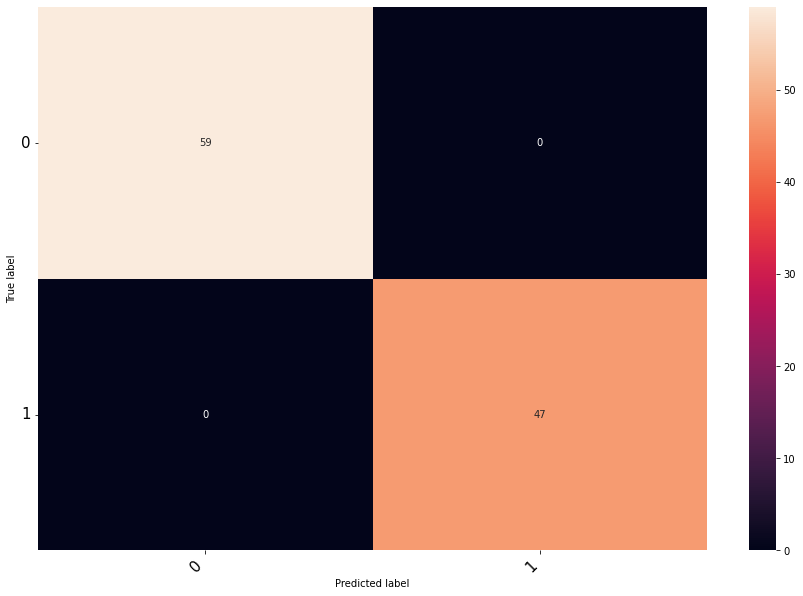

In [12]:
cm.visualize()

In [13]:
cm.class_accuracy

tensor([1.0000, 1.0000])

## BERT Fine-tuned augment negatives

In [21]:
save_model = f'{save_path}_neg_nf'
log_dir = f'{log_path}_neg_nf'

dict_model = dict(
    shared_out_dim=[128,64,256],
    state_layers=[[20], [30]],
    action_layers=[[20], [30]],
    # shared_out_dim=[75],
    # state_layers=[[30]],
    # action_layers=[[30]],
    out_features=[1],
    lstm_model=[False],
    bert_name=["bert-base-multilingual-cased"],
    # training parameters
)

list_model = [dict(zip(dict_model.keys(), k)) for k in itertools.product(*dict_model.values())]

In [ ]:
if do_train:
    for d in tqdm(list_model):
        set_seed(seed)
        d = d.copy()

        train(
            model=StateActionModel(**d),
            dict_model=d,
            log_dir=log_dir,
            graph=graph,
            save_path=save_model,
            lr=1e-3,
            optimizer_name="adamw",
            n_epochs=120,
            batch_size=16,
            num_workers=0,
            scheduler_mode='max_val_mcc',
            debug_mode=False,
            steps_save=25,
            use_cpu=False,
            freeze_bert=True,
            balanced_actions=False,
            augment_negative=True,
            scheduler_patience=15,
        )

#### Results

In [13]:
res_test = test(
    graph=graph,
    save_path=save_model,
    n_runs=1,
    batch_size=64,
    num_workers=0,
    debug_mode=False,
    use_cpu=False,
    save=True,
)

toast.show_toast("Done")

100%|██████████| 52/52 [44:03<00:00, 50.83s/it]


True

In [14]:
res_test[0]

{'dict': {'shared_out_dim': 125,
  'state_layers': [20],
  'action_layers': [20],
  'out_features': 1,
  'lstm_model': False,
  'bert_name': 'bert-base-multilingual-cased',
  'train_lr': 0.001,
  'train_optimizer_name': 'adamw',
  'train_batch_size': 16,
  'train_scheduler_mode': 'max_val_acc',
  'train_balanced_actions': False,
  'train_augment_negative': True,
  'train_scheduler_patience': 15,
  'epoch': 100,
  'train_loss': 0.55674917,
  'train_acc': 0.7579213976860046,
  'val_acc': 0.7834393978118896,
  'val_mcc': 0.5819756820944954,
  'path_name': 'saved_neg\\125_[20]_[20]_1_False_bert-base-multilingual-cased_0.001_adamw_16_max_val_acc_False_True_15_100',
  'train_mcc': 0.5488043981095888,
  'test_mcc': 0.6164802220221751,
  'test_acc': 0.7830188274383545},
 'train_cm': [array([[279., 154.],
         [ 37., 319.]], dtype=float32)],
 'val_cm': [array([[57., 25.],
         [ 9., 66.]], dtype=float32)],
 'test_cm': [array([[38., 21.],
         [ 2., 45.]], dtype=float32)]}

In [15]:
all = res_test
# ascending order
sort_idx = np.argsort([k['dict'][metric_filter_1] for k in all])[::-1]
all[sort_idx[0]]['dict']

{'shared_out_dim': 125,
 'state_layers': [20],
 'action_layers': [20],
 'out_features': 1,
 'lstm_model': False,
 'bert_name': 'bert-base-multilingual-cased',
 'train_lr': 0.001,
 'train_optimizer_name': 'adamw',
 'train_batch_size': 16,
 'train_scheduler_mode': 'max_val_acc',
 'train_balanced_actions': False,
 'train_augment_negative': True,
 'train_scheduler_patience': 15,
 'epoch': 50,
 'train_loss': 0.59630173,
 'train_acc': 0.8821292519569397,
 'val_acc': 0.9044585227966309,
 'val_mcc': 0.8088043734960404,
 'path_name': 'saved_neg\\125_[20]_[20]_1_False_bert-base-multilingual-cased_0.001_adamw_16_max_val_acc_False_True_15_50',
 'train_mcc': 0.7640110776323683,
 'test_mcc': 0.7834478150981965,
 'test_acc': 0.8867923617362976}

In [16]:
all = res_test
# ascending order
sort_idx = np.argsort([k['dict'][metric_filter_2] for k in all])[::-1]
all[sort_idx[0]]['dict']

{'shared_out_dim': 125,
 'state_layers': [20],
 'action_layers': [20],
 'out_features': 1,
 'lstm_model': False,
 'bert_name': 'bert-base-multilingual-cased',
 'train_lr': 0.001,
 'train_optimizer_name': 'adamw',
 'train_batch_size': 16,
 'train_scheduler_mode': 'max_val_acc',
 'train_balanced_actions': False,
 'train_augment_negative': True,
 'train_scheduler_patience': 15,
 'epoch': 50,
 'train_loss': 0.59630173,
 'train_acc': 0.8821292519569397,
 'val_acc': 0.9044585227966309,
 'val_mcc': 0.8088043734960404,
 'path_name': 'saved_neg\\125_[20]_[20]_1_False_bert-base-multilingual-cased_0.001_adamw_16_max_val_acc_False_True_15_50',
 'train_mcc': 0.7640110776323683,
 'test_mcc': 0.7834478150981965,
 'test_acc': 0.8867923617362976}

#### cm

In [17]:
cm = all[sort_idx[0]]['test_cm'][0]

<module 'matplotlib.pyplot' from 'c:\\Users\\vibal\\PycharmProjects\\text-games\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

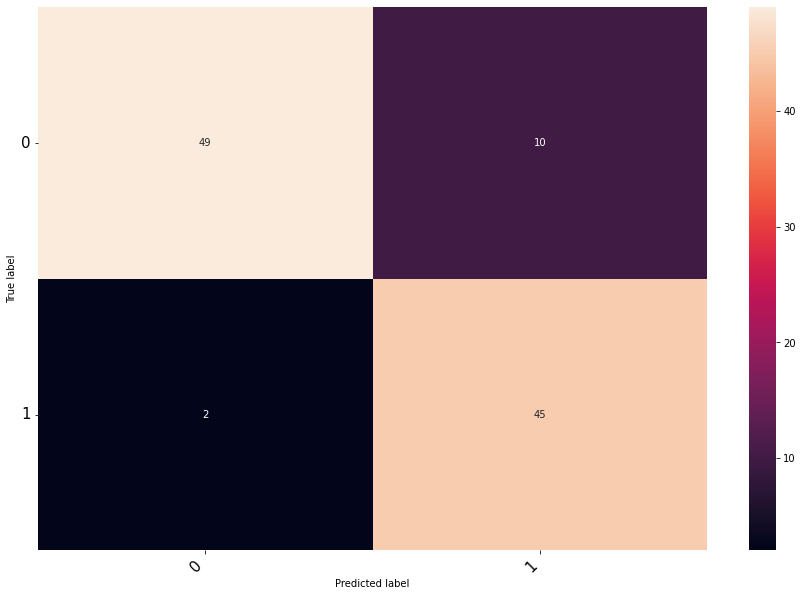

In [18]:
cm.visualize()

In [19]:
cm.class_accuracy

tensor([0.8305, 0.9574])

## BERT Fine-tuned balanced_actions

In [14]:
save_model = f'{save_path}_balanced'
log_dir = f'{log_path}_balanced'

dict_model = dict(
    shared_out_dim=[125,75,200],
    state_layers=[[20], [30]],
    action_layers=[[20], [30]],
    out_features=[1],
    lstm_model=[False],
    bert_name=["bert-base-multilingual-cased"],
    # training parameters
)

list_model = [dict(zip(dict_model.keys(), k)) for k in itertools.product(*dict_model.values())]

In [16]:
if do_train:
    for d in tqdm(list_model):
        set_seed(seed)
        d = d.copy()

        train(
            model=StateActionModel(**d),
            dict_model=d,
            log_dir=log_dir,
            graph=graph,
            save_path=save_model,
            lr=1e-3,
            optimizer_name="adamw",
            n_epochs=4500,
            batch_size=8,
            num_workers=0,
            scheduler_mode='max_val_acc',
            debug_mode=False,
            steps_save=450,
            use_cpu=False,
            freeze_bert=True,
            balanced_actions=True,
            augment_negative=True,
            scheduler_patience=450,
        )

  0%|          | 0/12 [00:00<?, ?it/s]Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
shared_out_dim=125/state_layers=[20]/action_layers=[20]/out_features=1/lstm_model=False/bert_name=bert-bas

RuntimeError: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility

#### Results

In [ ]:
res_test = test(
    graph=graph,
    save_path=save_model,
    n_runs=1,
    batch_size=64,
    num_workers=0,
    debug_mode=False,
    use_cpu=False,
    save=True,
)

toast.show_toast("Done")

In [ ]:
res_test[0]

In [ ]:
all = res_test
# ascending order
sort_idx = np.argsort([k['dict'][metric_filter_1] for k in all])[::-1]
all[sort_idx[0]]['dict']

In [ ]:
all = res_test
# ascending order
sort_idx = np.argsort([k['dict'][metric_filter_2] for k in all])[::-1]
all[sort_idx[0]]['dict']

#### cm

In [ ]:
cm = all[sort_idx[0]]['test_cm'][0]

In [ ]:
cm.visualize()

In [ ]:
cm.class_accuracy